<center><img src="https://github.com/FASSt-simulation/fasst_simulation_tools/raw/main/images/site-logo.png" width=150 height=150 alt="NGEE-Arctic Logo"/></center>

# Tutorial: *Exploring the results from a small ELM ensemble simulation*
This tutorial illustrates how to evaluate the results from a small parameter ensemble perturbation experiment with ELM at one of the four [NGEE-Arctic](https://ngee-arctic.ornl.gov/) study sites.


In [1]:
# Load the required Python libraries

import matplotlib.pyplot as plt
import xarray
from netCDF4 import Dataset 
import os
import cftime
import ipywidgets as widgets
import glob, numpy

In [2]:
# Create ensemble case root run output directories

output_rootdir=os.path.expanduser('~')+'/output/cime_run_dirs/UQ/'
cases=numpy.asarray(glob.glob("%s*20TR*" % output_rootdir))
cases=[x.split('/')[-1] for x in cases]
cases_dropdown = widgets.Dropdown(options=cases,
                                description='Chose Case Name:',
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

In [3]:
# Show a dropdown menu to select specific case output
# Any cases that have been run in our elmoutput directory will be displayed
# Case names will contain the site codes:
# AK-BEO; AK-CLG; AK-K64G AK-TLG

display(cases_dropdown)

Dropdown(description='Chose Case Name:', layout=Layout(width='max-content'), options=('OLMT_ens_AK-K64G_ICB20T…

In [20]:
## show ensemble sub-folders for the root transient case
ensemble_root_dirs=output_rootdir+cases_dropdown.value+"/"
ens_dirs=sorted(numpy.asarray(glob.glob("%s*g?*" % ensemble_root_dirs)))
ens_dirs= [ x for x in ens_dirs if "param_list" not in x ]
ens_cases=sorted([x.split('/')[-1] for x in ens_dirs])
print(''.join(['Ensemble case directories: ',str(ens_cases)]))

Ensemble case directories: ['g00001', 'g00002', 'g00003', 'g00004', 'g00005', 'g00006']


In [21]:
## read in outputs
for x in range(0,len(ens_dirs),1):
  print(ens_dirs[x])
  temdir=ens_dirs[x]
  print(''.join(["output_",str(x)]))
  output_file=ens_dirs[x]+'/'+'ELM_output.nc'
  globals()[''.join(["output_",str(x)])]=xarray.open_dataset(output_file).squeeze()

/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00001
output_0
/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00002
output_1
/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00003
output_2
/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00004
output_3
/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00005
output_4
/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00006
output_5


In [22]:
print(output_0)

<xarray.Dataset>
Dimensions:                   (levgrnd: 15, levlak: 10, levdcmp: 15,
                               time: 1826, hist_interval: 2, ltype: 9,
                               natpft: 17)
Coordinates:
  * levgrnd                   (levgrnd) float32 0.007101 0.02792 ... 21.33 35.18
  * levlak                    (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                   (levdcmp) float32 0.007101 0.02792 ... 21.33 35.18
  * time                      (time) object 1850-01-01 00:00:00 ... 1855-01-0...
Dimensions without coordinates: hist_interval, ltype, natpft
Data variables: (12/562)
    mcdate                    (time) int32 ...
    mcsec                     (time) int32 ...
    mdcur                     (time) int32 ...
    mscur                     (time) int32 ...
    nstep                     (time) int32 ...
    time_bounds               (time, hist_interval) object ...
    ...                        ...
    leaf_npimbalance          (time) float32

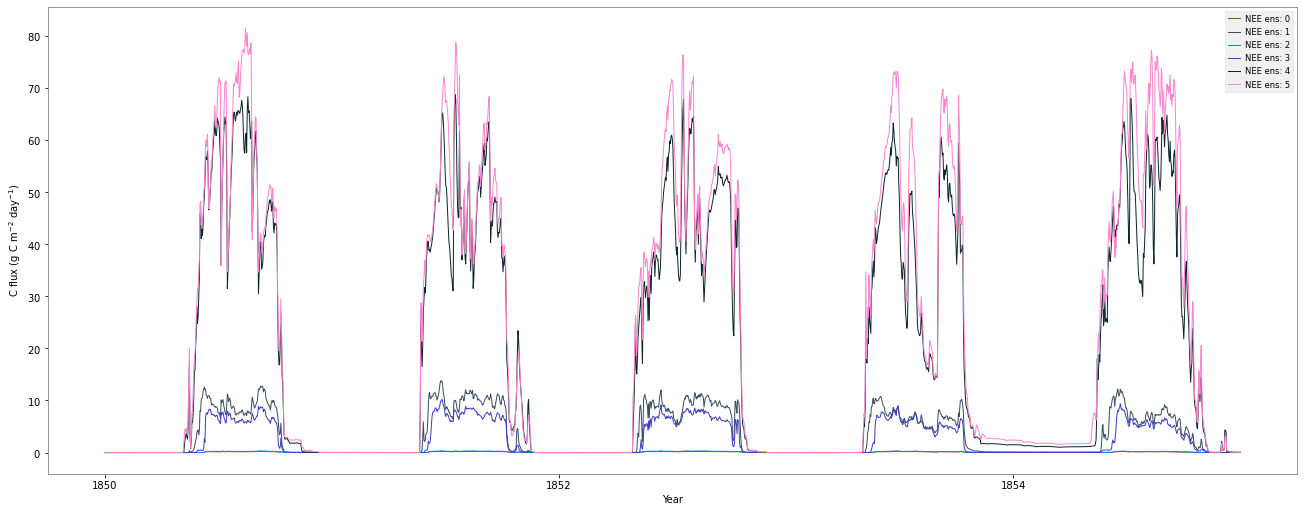

In [23]:
# Subset output to the 1990-2000 period
timerange=slice('1850-01-01','1855-01-01')
invar='NEE'
scaler=24*3600
units='C flux (g C m$^{-2}$ day$^{-1}$)'

# Create the figure
fig, ax = plt.subplots(clear=True, figsize=(18,7))
for x in range(0,len(ens_dirs),1):
  outputnum=''.join(["output_",str(x),str([invar])])
  plotdata=eval(outputnum)
  plotdata=plotdata*scaler  
  plotlab=''.join([invar,' ens: ',str(x)])
  plotdata.sel(time=timerange).plot(ax=ax,linestyle='-',color=numpy.random.rand(3,), label=plotlab)
  ax.legend()
  ax.set(xlabel='Year',ylabel=units)
plt.show()  

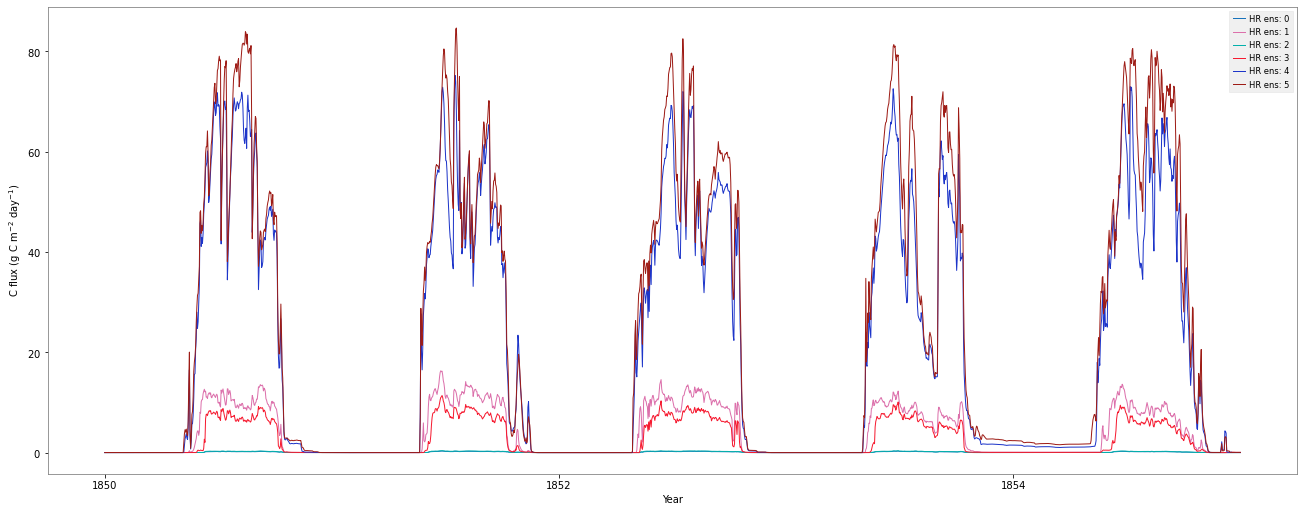

In [24]:
# Subset output to the 1990-2000 period
timerange=slice('1850-01-01','1855-01-01')
invar='HR'
scaler=24*3600
units='C flux (g C m$^{-2}$ day$^{-1}$)'

# Create the figure
fig, ax = plt.subplots(clear=True, figsize=(18,7))
for x in range(0,len(ens_dirs),1):
  outputnum=''.join(["output_",str(x),str([invar])])
  plotdata=eval(outputnum)
  plotdata=plotdata*scaler  
  plotlab=''.join([invar,' ens: ',str(x)])
  plotdata.sel(time=timerange).plot(ax=ax,linestyle='-',color=numpy.random.rand(3,), label=plotlab)
  ax.legend()
  ax.set(xlabel='Year',ylabel=units)
plt.show()  

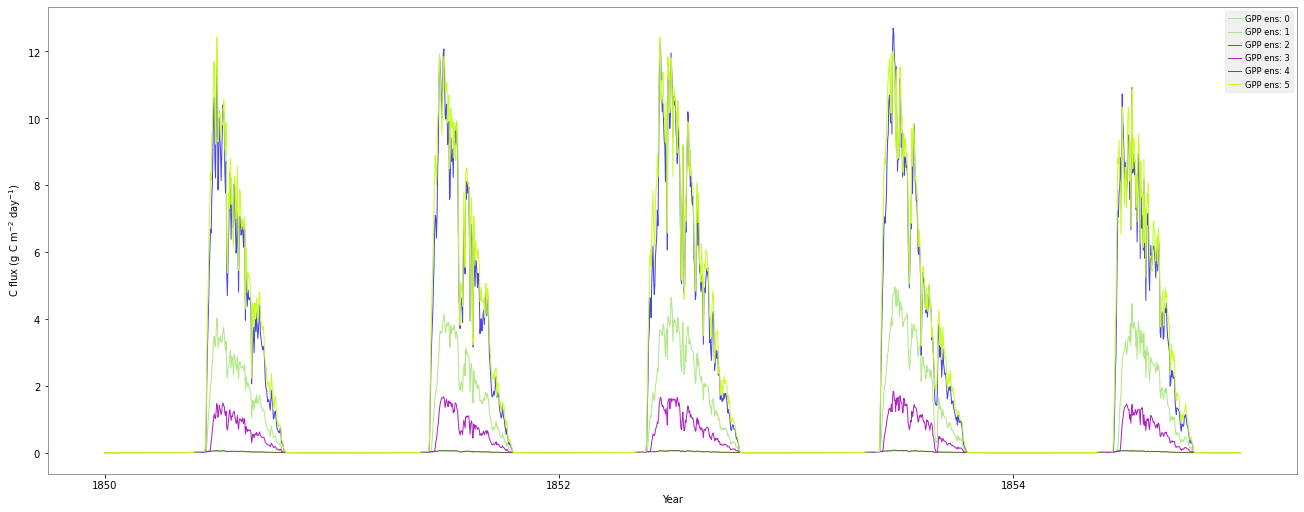

In [25]:
# Subset output to the 1990-2000 period
timerange=slice('1850-01-01','1855-01-01')
invar='GPP'
scaler=24*3600
units='C flux (g C m$^{-2}$ day$^{-1}$)'

# Create the figure
fig, ax = plt.subplots(clear=True, figsize=(18,7))
for x in range(0,len(ens_dirs),1):
  outputnum=''.join(["output_",str(x),str([invar])])
  plotdata=eval(outputnum)
  plotdata=plotdata*scaler  
  plotlab=''.join([invar,' ens: ',str(x)])
  plotdata.sel(time=timerange).plot(ax=ax,linestyle='-',color=numpy.random.rand(3,), label=plotlab)
  ax.legend()
  ax.set(xlabel='Year',ylabel=units)
plt.show()  

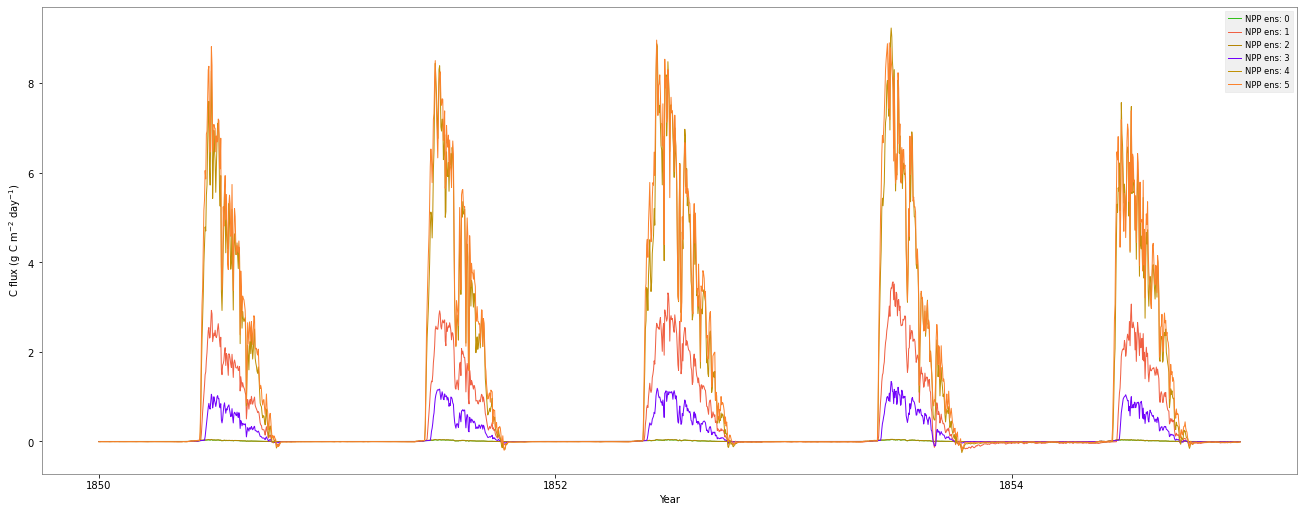

In [26]:
# Subset output to the 1990-2000 period
timerange=slice('1850-01-01','1855-01-01')
invar='NPP'
scaler=24*3600
units='C flux (g C m$^{-2}$ day$^{-1}$)'

# Create the figure
fig, ax = plt.subplots(clear=True, figsize=(18,7))
for x in range(0,len(ens_dirs),1):
  outputnum=''.join(["output_",str(x),str([invar])])
  plotdata=eval(outputnum)
  plotdata=plotdata*scaler  
  plotlab=''.join([invar,' ens: ',str(x)])
  plotdata.sel(time=timerange).plot(ax=ax,linestyle='-',color=numpy.random.rand(3,), label=plotlab)
  ax.legend()
  ax.set(xlabel='Year',ylabel=units)
plt.show()  